In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Poisson's Equation
Initialize constants

In [2]:
s1 = -1
s2 = 1
N = 41

In [3]:
r = 0.45
D = 0.1

##### time constant of information spread
r = 0.45 = D dt / dx2

In [4]:
dx = round((s2-s1)/(N-1), 2)
x = np.linspace(s1,s2,N)
x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ])

In [5]:
dt = round(r*(dx**2)/D, 5)
dt

0.01125

In [6]:
def find_index(x_value):
    return int((x_value-s1+0.00002)/dx)

In [7]:
Co = np.zeros(len(x)) # length is 41, max index thus 40
for i in range(find_index(-.3), find_index(.3)+1):
    Co[i] = 1.0
C = {0: Co} # at t=0, intitial coordinates

In [8]:
tm = 0 #t n-1
t = dt
tfinal = 1

ghost_L = C[0][1]
ghost_R = C[0][-2]

while (t<tfinal):
    # since derivative is 0, ghost points are flat
    
    Cn = []
    for i in range(N):
        if(i==0):
            Cn.append(r*(C[tm][i+1] + ghost_L) + (1-2*r)*C[tm][i])
        elif(i==N-1):
            Cn.append(r*(ghost_R + C[tm][i-1]) + (1-2*r)*C[tm][i])
        else:
            Cn.append(r*(C[tm][i+1] + C[tm][i-1]) + (1-2*r)*C[tm][i])
        
    C[t] = np.array(Cn)
    
    ghost_L = Cn[1]
    ghost_R = Cn[-2]
    tm = t
    t = round(t+dt,5)

In [9]:
#C

In [10]:
def time(t):
    return(round(dt*int(t/dt),5))

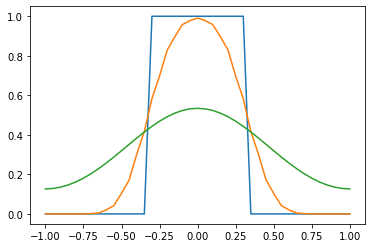

In [11]:
plt.figure()
plt.plot(x, C[0])
plt.plot(x, C[time(.1)])
plt.plot(x, C[time(1)])

## Animation!

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import time

In [13]:
data = list(C.values())

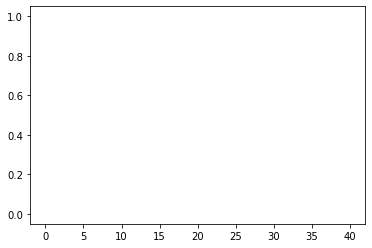

In [14]:
import matplotlib
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
for i in data:
    t = plt.plot(i)
    camera.snap()
animation = camera.animate()
animation.save('diffusion.gif', writer = 'imagemagick')

## Part B

In [15]:
s1 = 0
s2 = 1

N = 51
r = 0.45
D = 0.1

In [16]:
x = np.linspace(s1,s2,N)
x

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [17]:
dx = round((s2-s1)/(N-1), 2) #0.02
dt = round((r*dx*dx)/D, 5)
dt

0.0018

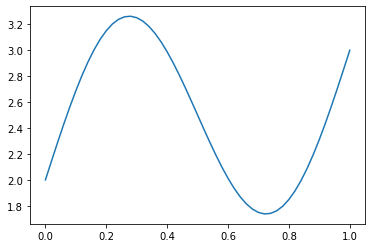

In [18]:
plt.plot(x, 2+x+np.sin(2*np.pi*x))

In [19]:
C = [2+x+np.sin(2*np.pi*x)]

In [20]:
dx = round((s2-s1)/(N-1), 2)
dt = round(r*(dx**2)/D, 5)

In [21]:
t = 0
tfinal = 1

ghost_L = 2 #Dirichlet Boundary Conditions
ghost_R = 3

C = [2+x+np.sin(2*np.pi*x)]

while (t<tfinal):
    Cn = []
    for i in range(N):
        if(i==0):
            Cn.append(ghost_L)
        elif(i==N-1):
            Cn.append(ghost_R)
        else:
            Cn.append(r*(C[-1][i+1] + C[-1][i-1]) + (1-2*r)*C[-1][i])
        
    C.append(np.array(Cn))
    t = round(t+dt,5)

In [22]:
len(C)

557

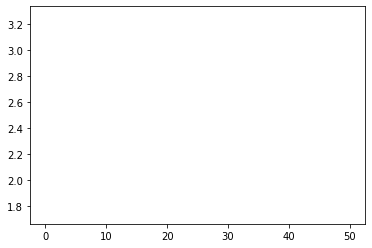

In [23]:
import matplotlib
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
for i in C:
    t = plt.plot(i)
    camera.snap()
animation = camera.animate()
animation.save('PartB.gif', writer = 'imagemagick')

Discussion. 

A twin peaking sinusoidal curve flattens to a line. AS time passes, neighbors average out and extremes fade away

In [43]:
def time(t):
    return(int(t/dt))

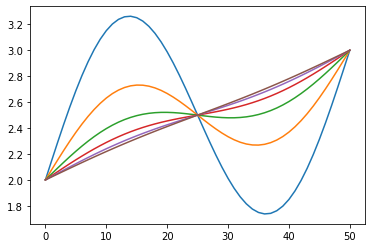

In [25]:
plt.plot(C[0])
plt.plot(C[time(.2)])
plt.plot(C[time(.4)])
plt.plot(C[time(.6)])
plt.plot(C[time(.8)])
plt.plot(C[time(.99)])

# Numerical Stability

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import time

In [20]:
s1 = 0
s2 = 10

dx = 0.1
dt=0.01
D=0.25
r = 0.25

In [21]:
N = int((s2-s1)/dx + 1)

In [22]:
x = np.linspace(s1,s2, N)
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [23]:
k = 10

In [24]:
C = [(2+np.sin(x)+np.sin(k*x))]

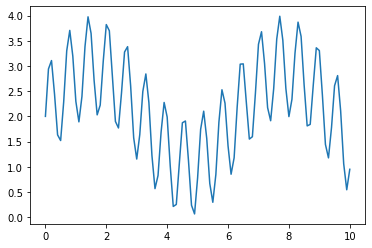

In [25]:
plt.plot(x, C[0])

In [53]:
ks = [3, 5, 7, 10, 15, 20]

In [54]:
t = 0
tfinal = 1

ghost_L = 0 #Dirichlet Boundary Conditions
ghost_R = 0

Cs = {}

for k in ks:
    C = [(2+np.sin(x)+np.sin(k*x))]
    while (t<tfinal):
        Cn = []
        for i in range(N):
            if(i==0):
                Cn.append(ghost_L)
            elif(i==N-1):
                Cn.append(ghost_R)
            else:
                Cn.append(r*(C[-1][i+1] + C[-1][i-1]) + (1-2*r)*C[-1][i])

        C.append(np.array(Cn))
        t = round(t+dt,5)
    Cs[k] = C
    t=0

In [38]:
Cs[10]

[array([2.        , 2.9413044 , 3.10796676, 2.43664021, 1.63261585,
        1.52050126, 2.28522698, 3.30120429, 3.70671434, 3.19544539,
        2.29744987, 1.89121715, 2.39546617, 3.38372522, 3.97605709,
        3.64778283, 2.71167029, 2.03026732, 2.22286038, 3.0961773 ,
        3.82224268, 3.69986501, 2.79964509, 1.89948481, 1.76988482,
        2.46612039, 3.27805982, 3.38375581, 2.60589394, 1.57561545,
        1.15308838, 1.63754302, 2.49305254, 2.84216617, 2.27354158,
        1.2210341 , 0.5657007 , 0.82662573, 1.68451069, 2.27602923,
        1.98831067, 1.02310022, 0.21190268, 0.25205932, 1.06609985,
        1.87337341, 1.90809734, 1.12364987, 0.23558073, 0.06379473,
        0.77870087, 1.74441449, 2.10317294, 1.56365771, 0.66844646,
        0.2947045 , 0.84718236, 1.88547921, 2.52827047, 2.26286134,
        1.41577388, 0.85171973, 1.1777299 , 2.1841696 , 3.03657524,
        3.04194867, 2.28499021, 1.54932994, 1.59618567, 2.46365495,
        3.43087728, 3.68002369, 3.04749123, 2.17

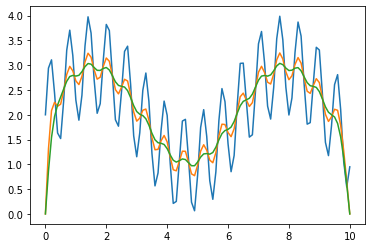

In [46]:
plt.plot(x, Cs[10][0])
plt.plot(x, Cs[10][5])
plt.plot(x, Cs[10][10])

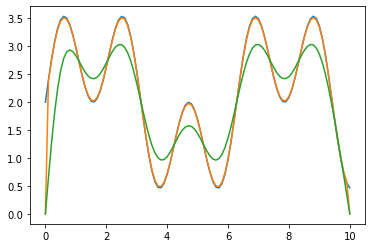

In [52]:
plt.plot(x, Cs[3][0])
plt.plot(x, Cs[3][1])
plt.plot(x, Cs[3][30])

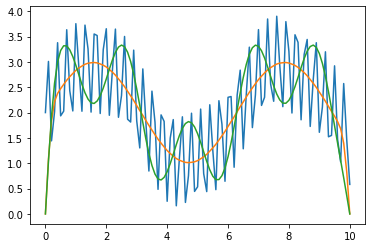

In [57]:
plt.plot(x, Cs[20][0])
plt.plot(x, Cs[20][5])
plt.plot(x, Cs[3][10])
#plt.plot(x, Cs[20][30])

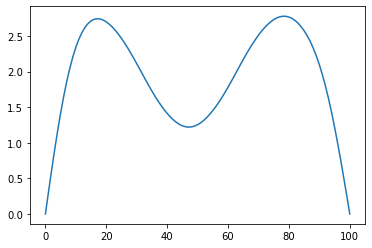

In [44]:
plt.plot(Cs[5][100])

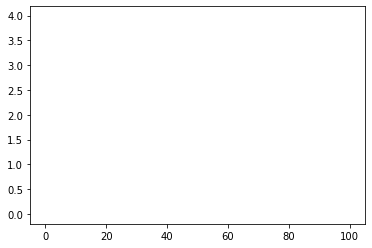

In [11]:
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
for i in C[:40]:
    t = plt.plot(i)
    camera.snap()
animation = camera.animate()
animation.save('diffusion3.gif', writer = 'imagemagick')

# Numerical Accuracy

## Dufort Frankel

In [49]:
s1 = -1
s2 = 1
Ns = [20, 40, 80, 160]
dxs = [(s2-s1)/(N-1) for N in Ns]
dxs

[0.10526315789473684,
 0.05128205128205128,
 0.02531645569620253,
 0.012578616352201259]

In [19]:
N =20
dx = (s2-s1)/(N-1)
x = np.linspace(s1, s2, N)
x

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [37]:
def find_index(x):
    return int(round((x-s1)/dx, 0))

In [38]:
find_index(-.3)

7

In [39]:
Co = np.array([1 if i in range(find_index(-.3), find_index(.3)+1) else 0 for i in range(len(x))])

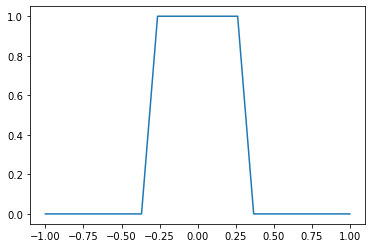

In [40]:
plt.plot(x, Co)

In [58]:
t = 0
tfinal = 1

r = 0.5
D=2
dt = r*dx*dx/D

ghost_L = 0 #Dirichlet Boundary Conditions
ghost_R = 0

C = [Co, Co]

In [75]:
Cs = {}
dt

0.0027700831024930744

In [88]:
#for i in range(len(Ns)):
N = Ns[0]
dx = dxs[0]

while(t<tfinal):

    Cn = []    
    for j in range(N):
        if(j==0):
            Cn.append((2*r*(C[-1][j+1] + ghost_L) + (1-2*r)*C[-2][j])/(1+2*r))
        elif(j==N-1):
            Cn.append((2*r*(ghost_R + C[-1][j-1]) + (1-2*r)*C[-2][j])/(1+2*r))
        else:
            Cn.append((2*r*(C[-1][j+1] + C[-1][j-1]) + (1-2*r)*C[-2][j])/(1+2*r))

    C.append(np.array(Cn))

    ghost_L = Cn[1]
    ghost_R = Cn[-2]

    t+=dt

In [77]:
len(C)

2

In [ ]:
C

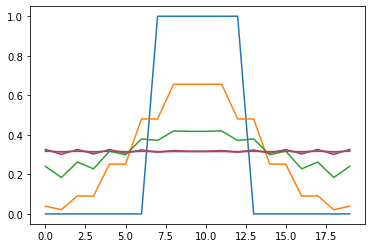

In [74]:
plt.plot(C[0])
plt.plot(C[10])
plt.plot(C[30])
plt.plot(C[100])
plt.plot(C[200])
plt.plot(C[300])

In [89]:
Cs = {}

In [96]:
dt

0.0027700831024930744

In [97]:
for i in range(len(Ns)):
    
    t = 0
    tfinal = 0.01
    
    N = Ns[i]
    dx = dxs[i]
    
    C = [Co, Co]
    print("N: ", N)

    while(t<tfinal):

        Cn = []    
        for j in range(N):
            print(j)
            if(j==0):
                Cn.append((2*r*(C[-1][j+1] + ghost_L) + (1-2*r)*C[-2][j])/(1+2*r))
            elif(j==N-1):
                Cn.append((2*r*(ghost_R + C[-1][j-1]) + (1-2*r)*C[-2][j])/(1+2*r))
            else:
                x = (2*r*(C[-1][j+1] + C[-1][j-1]) + (1-2*r)*C[-2][j])
                Cn.append((2*r*(C[-1][j+1] + C[-1][j-1]) + (1-2*r)*C[-2][j])/(1+2*r))

        C.append(np.array(Cn))

        ghost_L = Cn[1]
        ghost_R = Cn[-2]

        t+=dt
    
    Cs[N] = C

N:  20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
N:  40
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


IndexError: index 20 is out of bounds for axis 0 with size 20

In [91]:
Cs

{20: [array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]),
  array([0.16239962, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.5       , 0.5       , 1.        , 1.        ,
         1.        , 1.        , 0.5       , 0.5       , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.16239962]),
  array([0.        , 0.08119981, 0.        , 0.        , 0.        ,
         0.25      , 0.25      , 0.75      , 0.75      , 1.        ,
         1.        , 0.75      , 0.75      , 0.25      , 0.25      ,
         0.        , 0.        , 0.        , 0.08119981, 0.        ]),
  array([0.08119981, 0.        , 0.04059991, 0.        , 0.125     ,
         0.125     , 0.5       , 0.5       , 0.875     , 0.875     ,
         0.875     , 0.875     , 0.5       , 0.5       , 0.125     ,
         0.125     , 0.        , 0.04059991, 0.        , 0.08119981]),
  array([0.        ,

In [92]:
Cs.keys()

dict_keys([20])